In [4]:
#%load_ext autoreload
#%autoreload 2
import ibmdata
import create_wafermap_signatures as cws
pattlist = {
    "good"           :"""radius_center_5.isin(['Z'])""",
    "all"            :"""radius_center_5.isin(['A','B','C','D','E'])""",
    "A"              :"""radius_center_5.isin(['A'])""",
    "B"              :"""radius_center_5.isin(['B'])""",
    "C"              :"""radius_center_5.isin(['C'])""",
    "D"              :"""radius_center_5.isin(['D'])""",
    "E"              :"""radius_center_5.isin(['E'])""",
    "center"         :"""radius_center_5.isin(['A','B'])""",
    "edge"           :"""radius_center_5.isin(['D','E'])""",
    "bottom_4"       :"""unitcell_y < 6""",
    "cde_bottom"     :"""radius_center_5.isin(['C','D','E']) & quadrant.isin(['3','4'])""",
    "e_bottom"       :"""radius_center_5.isin(['E']) & quadrant.isin(['3','4'])""",
    "c_bottom"       :"""radius_center_5.isin(['C']) & quadrant.isin(['3','4'])""",
    "equator"        :"""unitcell_y == 6""",
    "GF_Top"         :"""unitcell_y == 11""",
    "GF_Bot"         :"""unitcell_y == 2""",
    "BottomChip"     :"""unitcell_y == 2 and unitcell_x == 8""",
    "RightChip"      :"""unitcell_y == 7 and unitcell_x == 12""",
}
signaturelist = {
#     "good"               :{"wafer_count":100,"signature":[[pattlist["all"],[0,1]]]},
#     "GF_Top"             :{"wafer_count":20,"signature":[[pattlist["all"],[0,1]],[pattlist['GF_Top'],[20,25]],[pattlist['GF_Bot'],[3,10]]]},
#     "GF_Bot"             :{"wafer_count":20,"signature":[[pattlist["all"],[0,1]],[pattlist['GF_Top'],[3,10]],[pattlist['GF_Bot'],[20,25]]]},
#     "GF_Bot_hc"          :{"wafer_count":3,"signature":[[pattlist["all"],[0,1]],[pattlist['GF_Top'],[3,10]],[pattlist['GF_Bot'],[20,25]],[pattlist['BottomChip'],[999,1000]]]},
#     "High_ct1"           :{"wafer_count":5,"signature":[[pattlist["all"],[0,1]],[pattlist['BottomChip'],[999,1000]]]},
#     "High_ct2"           :{"wafer_count":5,"signature":[[pattlist["all"],[0,1]],[pattlist['RightChip'],[999,1000]]]},
#    "center_expanding"   :{"wafer_count":20,"signature":[[pattlist["all"],[200,250]],[pattlist["A"],[250,300]],[pattlist["B"],[230,280]],[pattlist["C"],[220,260]],[pattlist["D"],[210,250]]]},
    "bottom_arc_wafer"   :{"wafer_count":100,"signature":[[pattlist["cde_bottom"],[5,20]]]},
    "bottom_wafer"       :{"wafer_count":100,"signature":[[pattlist["all"],[0,2]],[pattlist["bottom_4"],[5,20]]]},
#    "center_only"        :{"wafer_count":20,"signature":[[pattlist["all"],[0,2]],[pattlist["A"],[10,50]],[pattlist["B"],[0,15]]]},
}
geo = cws.get_geo("p10dd2")
debugmaps = cws.create_wafermap(geo,signaturelist)
debugmaps.to_csv("debugmaps.csv")

[<AxesSubplot:title={'center':'wafer-1'}>,
 <AxesSubplot:title={'center':'wafer-10'}>,
 <AxesSubplot:title={'center':'wafer-100'}>,
 <AxesSubplot:title={'center':'wafer-101'}>,
 <AxesSubplot:title={'center':'wafer-102'}>,
 <AxesSubplot:title={'center':'wafer-103'}>]

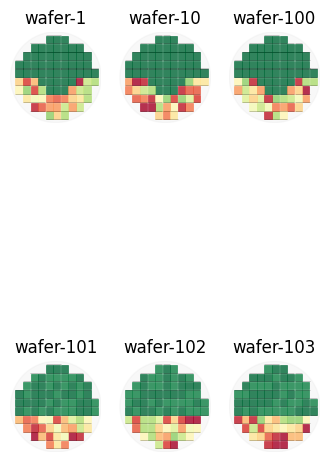

In [5]:
from ibmdata.plot.wafermap import wafermap, wafermap_gallery, WafermapConfig
import pandas as pd
import matplotlib as mpl
inputdf = pd.read_csv("debugmaps.csv")
maps = []
columns = 3
for sig, sigdf in inputdf.groupby(['signature']):
    wafcnt = 0
    for waf, wafdf in sigdf.groupby(['wafer_id']):
        if wafcnt >= columns:
            break
        maps.append(wafdf)
        wafcnt = wafcnt + 1
filldf = pd.concat(maps)
width = 400
height = 800
display(
    wafermap_gallery(
        WafermapConfig(
            filldf, 
            chipx_column='normalized_testx', 
            chipy_column='normalized_testy', 
            color_by_column='value', 
            colormap = mpl.cm.RdYlGn.reversed(),
            #discrete=True, 
            title=f"wafermaps",
            #plot_type='plotly',
            plot_type='mpl',
            width=width,
            height=height,
            show_kerf_borders=False
        ), 
        wafer_column='wafer_id',
        columns = columns
    )
)

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pteClustering
import warnings
#warnings.filterwarnings("error")

#pulldf = pd.read_csv("p10_za_wft_sram_dbc_fails.csv")
pulldf = pd.read_csv("debugmaps.csv")
failcol = 'value'
wafx = 'unitcell_x'
wafy = 'unitcell_y'
interpolate_wmap = False

rfedf, wafers, B, Alpha, etas, nonzero_indices = pteClustering.runRobustFeatureExtraction(pulldf, failcol, wafx, wafy)


Hit max iterations.


ValueError: Invalid cluster formation criterion: unitcell_y

In [4]:
classifieddf, resultsdf, clusters, results = pteClustering.hierarchicalClustering(df = rfedf, etas=etas, wafers = wafers, t = 100, criterion = 'distance')

In [30]:
classifieddf, resultsdf, clusters, results = pteClustering.hierarchicalClustering(df = rfedf, etas=etas, wafers = wafers, t = 5, criterion = 'maxclust')

In [31]:
results

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1],
      dtype=int32)

In [6]:
(results[100:200] == 1).sum()

5

In [32]:
for i in range(1,len(clusters)+1):
    print(i, len(clusters[i]))

1 5
2 20
3 120
4 5
5 3


Summary


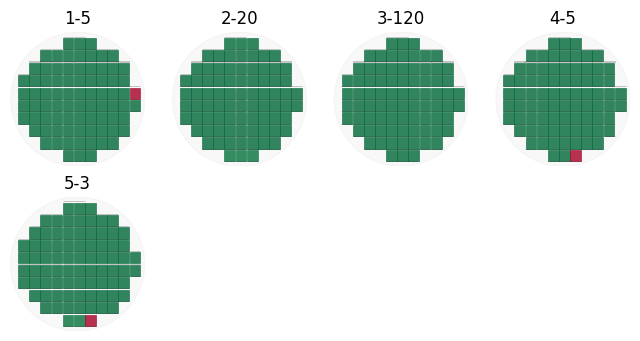

Samples
group = 1


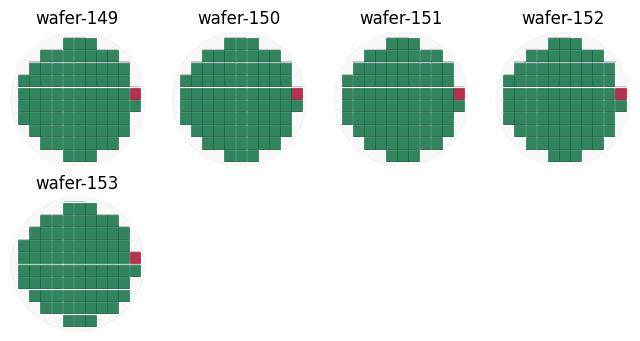

group = 2


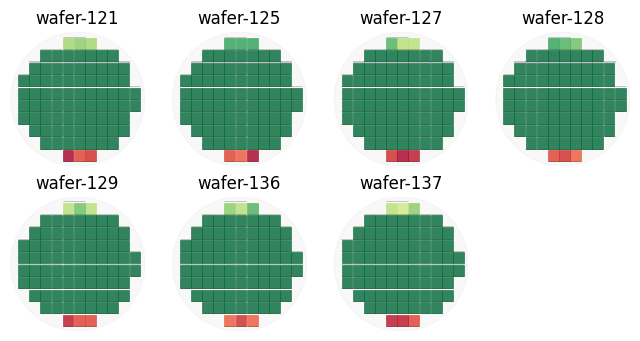

group = 3


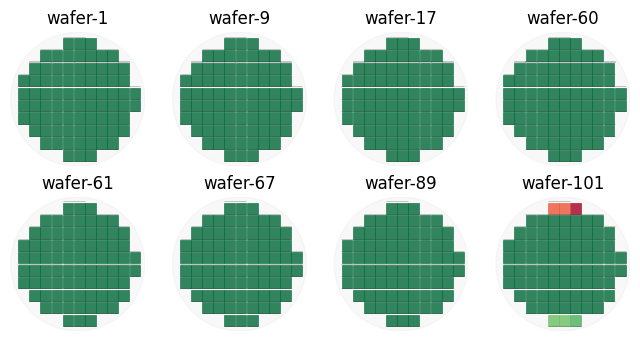

group = 4


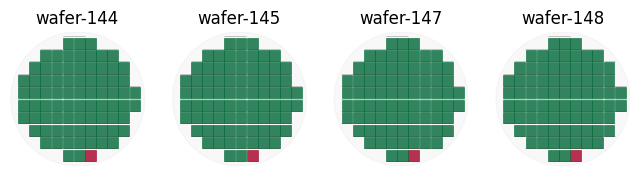

group = 5


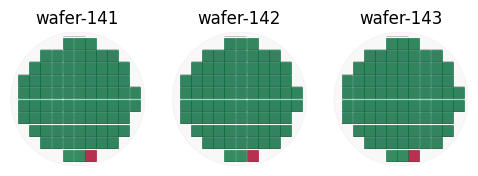

In [33]:
pteClustering.plot_results(classifieddf, failcol, interpolate_wmap)